In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from LogicalQ.LogicalGeneral import LogicalCircuitGeneral
from LogicalQ.Library.QECCs import five_qubit_code, steane_code, four_qubit_code
from LogicalQ.NoiseModel import construct_noise_model_QuantinuumH1_1
from LogicalQ.Execution import execute_circuits

%load_ext autoreload
%autoreload 2

[1, 2, 6]


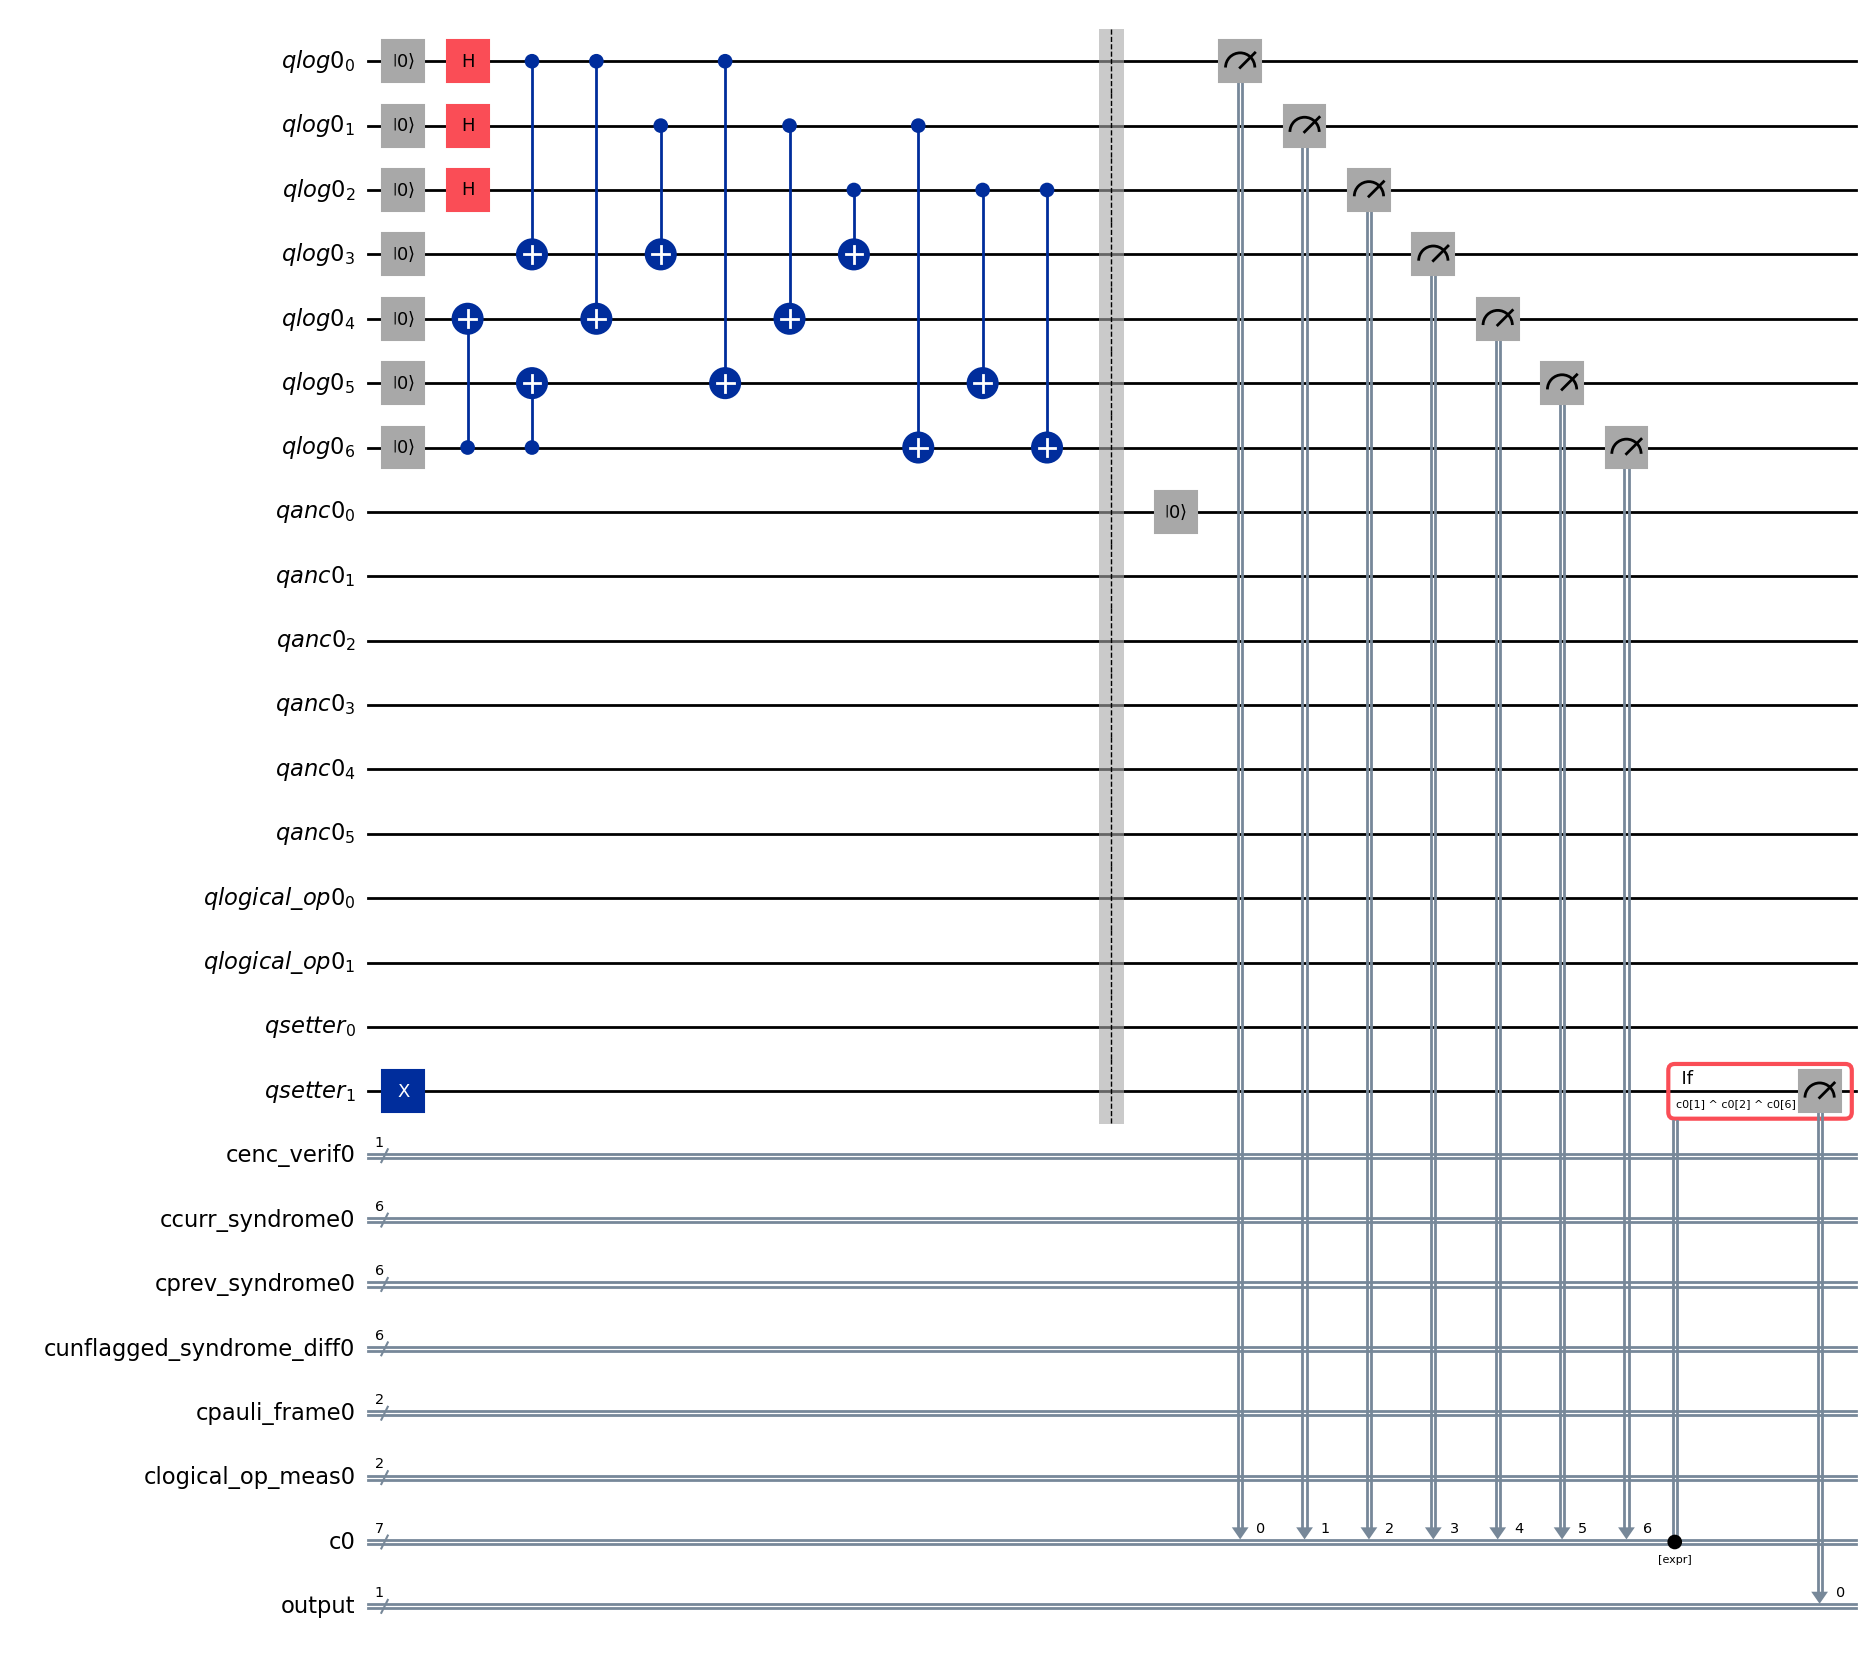

In [2]:
lqcirc = LogicalCircuitGeneral(1, **steane_code)
lqcirc.encode([0], max_iterations=0, initial_states=[0])
lqcirc.measure_all(with_error_correction=False)
lqcirc.draw("mpl")

## Demonstrating error correction

In [3]:
code = steane_code
n = code['label'][0]

In [6]:
#Tests errors measuring in Z basis
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(1, **code)
    five_qubit_circ.encode(0, initial_states=[0])
    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors
        # five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0])
    five_qubit_circ.measure([0], [0], meas_basis='Z', with_error_correction=False)
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

[1, 2, 6]
[1, 2, 6]
[1, 2, 6]
[1, 2, 6]
[1, 2, 6]
[1, 2, 6]
[1, 2, 6]
[1, 2, 6]
['0 1100010 00 00 001000 001000 001000 0']
['1 1010111 00 10 011000 011000 011000 0']
['1 0110010 00 10 111000 111000 111000 0']
['0 0111110 00 00 101000 101000 101000 0']
['0 0101001 00 00 010000 010000 010000 0']
['0 0010110 00 00 110000 110000 110000 0']
['1 0101100 00 10 100000 100000 100000 0']
['0 0001111 00 00 000000 000000 000000 0']


In [7]:
#Tests errors measuring in X basis
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])

    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'Z') #Also try testing Z type errors
        five_qubit_circ.add_error(1,i,'Z')
    five_qubit_circ.append_qec_cycle([0,1])

    five_qubit_circ.h([0,1])

    five_qubit_circ.measure([0,1], [0,1], meas_basis='X', with_error_correction=False)
    
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

[4, 5, 6]
[4, 5, 6]


CircuitTooWideForTarget: 'Number of qubits (32) in circuit-331 is greater than maximum (29) in the coupling_map'

In [ ]:
#Tests errors measuring in Y basis
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])
    
    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors
        five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0,1])

    five_qubit_circ.h([0,1])
    five_qubit_circ.s([0,1])
    
    five_qubit_circ.measure([0,1], [0,1], meas_basis='Y', with_error_correction=True)
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

In [ ]:
#Tests CX pauli frame updates
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[1,1])

    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(1,i,'X') #Also try testing Z type errors

    five_qubit_circ.append_qec_cycle([0,1])

    five_qubit_circ.cx(1,0)

    five_qubit_circ.measure([0,1], [0,1], meas_basis='Z', with_error_correction=True)
    simulator = AerSimulator(method='stabilizer')
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

In [ ]:
#Tests CZ pauli frame updates
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,0])

    five_qubit_circ.h(1)
    five_qubit_circ.cx(1,0)

    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(1,i,'X') #Also try testing Z type errors

    five_qubit_circ.append_qec_cycle([0,1])

    five_qubit_circ.cz(1,0)
    five_qubit_circ.cx(1,0)
    five_qubit_circ.h(1)

    five_qubit_circ.measure([0,1], [0,1], meas_basis='Z', with_error_correction=True)
    simulator = AerSimulator(method='stabilizer')
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

In [ ]:
#Tests CY pauli frame updates
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,0])

    five_qubit_circ.h(1)
    
    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors

    five_qubit_circ.append_qec_cycle([0,1])

    five_qubit_circ.cy(1,0)
    five_qubit_circ.s(1)

    five_qubit_circ.cx(1,0)
    five_qubit_circ.h(1)

    five_qubit_circ.measure([0,1], [0,1], meas_basis='Z', with_error_correction=True)
    simulator = AerSimulator(method='stabilizer')
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

In [ ]:
#Tests T and T^dagger gate Pauli updates
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])
    five_qubit_circ.h([0,1])
    five_qubit_circ.t([0,1])

    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors
        five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0,1])

    five_qubit_circ.s([0,1])
    five_qubit_circ.tdg([0,1])
    five_qubit_circ.sdg([0,1])

    five_qubit_circ.h([0,1])

    five_qubit_circ.measure([0,1], [0,1], meas_basis='Z')
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)